In [1]:
#importing relevant libraries

from zaber_motion import Library
from zaber_motion.ascii import Connection
Library.enable_device_db_store()

from zaber_motion import Units
from controller import Imager

import cv2
import numpy as np

import matplotlib.pyplot as plt

#not sure what this is
#%matplotlib notebook

In [2]:
imager = Imager()

Found 1 devices
Devices IDs - ['101936']


In [3]:
#sets up acquisition

imager._start_acquisitions()
imager.cams[-1].remote_device.node_map.ExposureAuto.value = 'Off'
PIXELFORMATS = {'8':'Mono8','12':'Mono12Packed'}
PIXELFORMAT = PIXELFORMATS['12']
imager.update_params(ExposureTime=3500, PixelFormat=PIXELFORMAT)#, AcquisitionFrameRate = 50)

In [4]:
#for loop
#moves the gimbal and takes pictures, such that the light reaches all the pixels in the picture
#borders were chosen manually

  #borders according to the gimbal setup on 20/12/21:
  #borders named according to the gimbal, the light will be seen on the opposite "side"
  #left border: -19
  #right border: 19
  #top border: 16
  #bottom border: -13
  #step in X: 3 degrees
  #step in Y: 3 degrees



#declaring variables for borders
len_for_left = -24
len_for_right = 20
len_for_move_x = 3
num_for_row = int((abs(len_for_left)+abs(len_for_right)) / len_for_move_x)
len_for_move_y=2
len_for_up = 22
len_for_bottom = -20
num_for_col = int((abs(len_for_up)+abs(len_for_bottom))/len_for_move_y)



#connection to the gimbal

with Connection.open_serial_port("COM3") as connection: #changed to com3 from com4
    device_list = connection.detect_devices()
    print("Found {} devices".format(len(device_list)))
   
    #get axes
    vertical = device_list[1].get_axis(1) #axis Y
    horizontal = device_list[0].get_axis(1) #axis X
    
    #go to origin
    #in theory this step is superfluous, but the function move_absolute doesn't alwyas work
    #sometimes moves relative
    horizontal.move_absolute(0, Units.ANGLE_DEGREES)
    vertical.move_absolute(0, Units.ANGLE_DEGREES)
    
       
    #starting point
    horizontal.move_absolute(len_for_right, Units.ANGLE_DEGREES)
    vertical.move_absolute(len_for_up, Units.ANGLE_DEGREES)
   
    
    #initialization
    isimages = np.zeros([2048,2448]) 
    images = np.zeros([2048,2448])
    
    
   
    #scans the frame and takes pictures
    for cstep in range(num_for_col):
       
        for rstep in range(num_for_row):
            
            
            #checkpt is a tuple with 2 matrices
            #images: contains the sum of the light values from all the images
            #isimages: contains the number of times a certain pixel surviced the threshold
           
            (isimages, images), mean = imager.capture_sequence_and_get_cover(num_frames = 3, sleep_seconds1 = 0, 
                    sleep_seconds2 =0, frames_per_round=5, chckpt=(isimages, images))
            
            horizontal.move_relative(-1*len_for_move_x, Units.ANGLE_DEGREES)
            
            
         
        horizontal.move_absolute(len_for_right, Units.ANGLE_DEGREES)
        vertical.move_relative(-1*len_for_move_y, Units.ANGLE_DEGREES)
       
        
           
           


20
14
Found 2 devices
moved abs origin
moved to start
init
enetered for col
enetered for row
0 - 2022-01-02 10:42:30.421506 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:42:30.713196 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:42:30.941426 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:42:31.938034 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:42:32.232913 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:42:32.479541 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:42:33.455495 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:42:33.734358 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:42:33.964734 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:42:34.975089 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:42:35.284787 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:42:35.513840 - 101936 captured Mono12Pac

1 - 2022-01-02 10:43:32.168140 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:43:32.404253 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:43:33.400075 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:43:33.702651 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:43:33.957672 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:43:35.173256 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:43:35.473147 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:43:35.697521 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:43:36.740408 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:43:37.009259 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:43:37.263586 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:43:38.322217 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:43:38.577659 - 101936 captured Mon

gets to here
enetered for row
0 - 2022-01-02 10:44:35.405014 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:44:35.724392 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:44:36.024321 - 101936 captured Mono12Packed image 
gets to here
enetered for col
enetered for row
0 - 2022-01-02 10:44:40.487011 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:44:40.742196 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:44:40.982290 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:44:41.990705 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:44:42.236795 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:44:42.526272 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:44:43.573166 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:44:43.901647 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:44:44.146867 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2

1 - 2022-01-02 10:45:42.221946 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:45:42.485087 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:45:43.500393 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:45:43.790399 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:45:44.055734 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:45:45.099849 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:45:45.421948 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:45:45.685265 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:45:46.920100 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:45:47.211093 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:45:47.431315 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:45:48.486858 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:45:48.811147 - 101936 captured Mon

gets to here
enetered for row
0 - 2022-01-02 10:46:47.808529 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:46:48.077765 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:46:48.331935 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:46:49.535380 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:46:49.817961 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:46:50.089329 - 101936 captured Mono12Packed image 
gets to here
enetered for col
enetered for row
0 - 2022-01-02 10:46:54.699721 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:46:54.942747 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:46:55.238020 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:46:56.409068 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:46:56.676646 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:46:56.923858 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2

1 - 2022-01-02 10:47:56.545428 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:47:56.813460 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:47:57.998884 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:47:58.280738 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:47:58.545475 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:47:59.790265 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:48:00.036969 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:48:00.297680 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:48:01.547716 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:48:01.795210 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:48:02.069508 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:48:03.433842 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:48:03.704687 - 101936 captured Mon

gets to here
enetered for row
0 - 2022-01-02 10:49:04.274402 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:49:04.527173 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:49:04.787031 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:49:06.145660 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:49:06.395160 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:49:06.651537 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:49:07.935093 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:49:08.160189 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:49:08.421666 - 101936 captured Mono12Packed image 
gets to here
enetered for col
enetered for row
0 - 2022-01-02 10:49:12.985374 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:49:13.228146 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:49:13.493562 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2

1 - 2022-01-02 10:50:15.441344 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:50:15.693048 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:50:16.990471 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:50:17.260479 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:50:17.508049 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:50:18.749777 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:50:19.001282 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:50:19.254210 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:50:20.555011 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:50:20.830452 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:50:21.099203 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:50:22.362385 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:50:22.628626 - 101936 captured Mon

gets to here
enetered for row
0 - 2022-01-02 10:51:25.439683 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:51:25.691023 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:51:25.933038 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:51:27.215023 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:51:27.491482 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:51:27.751774 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:51:29.324866 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:51:29.562309 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:51:29.801099 - 101936 captured Mono12Packed image 
gets to here
enetered for row
0 - 2022-01-02 10:51:31.163246 - 101936 captured Mono12Packed image 
1 - 2022-01-02 10:51:31.429688 - 101936 captured Mono12Packed image 
2 - 2022-01-02 10:51:31.670301 - 101936 captured Mono12Packed image 
gets to here


Changed the above code:

Previously, in the for loop
  #if i==0:
            #    chkpt = None
            #    i+=1
         #   else:
          #      chkpt = (isimages, images)

(-0.5, 2447.5, 2047.5, -0.5)

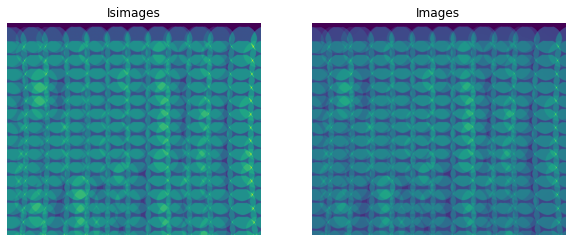

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,10))

im1 = ax[0].imshow(isimages)
ax[0].set_title('Isimages')
ax[0].axis('off')

im2 = ax[1].imshow(images)
ax[1].set_title('Images')
ax[1].axis('off')

In [13]:
#averaging each pixel

#initializes a matrix with zeroes
avg_pixel = np.zeros([2048,2448])

#finds the average of each pixel
np.divide(images, isimages, out=avg_pixel, where=isimages !=0)

#rounds each value to 3 decimal places
np.round(avg_pixel, decimals=3, out=avg_pixel)



array([[   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       ...,
       [2950.167, 3022.833, 2955.333, ..., 2865.167, 3022.167, 2980.167],
       [2815.   , 3067.   , 2839.833, ..., 2893.333, 2754.167, 2889.667],
       [2937.167, 3033.667, 2931.   , ..., 2961.5  , 3043.833, 2952.333]])